# Proyecto final del Curso de Decision Trees y Random Forest con Python y scikit-learn


In [33]:
# Importación de librerias basicas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_census = pd.read_csv('adult.csv')
df_census.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1953,51,Private,221672,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,15024,0,50,United-States,>50K
1148,56,Self-emp-inc,119891,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1672,40,United-States,<=50K
5760,37,Private,272950,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
19546,40,Local-gov,95639,HS-grad,9,Never-married,Craft-repair,Other-relative,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
26772,30,Private,162572,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,70,United-States,>50K
10388,19,Private,183041,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
6692,46,?,162034,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
13897,17,Private,174298,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
16324,39,Private,76767,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,60,United-States,<=50K
28654,47,Local-gov,102628,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,>50K


In [35]:
# Descripcion variables
df_census.info()
print(df_census.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
(32561, 15)


In [36]:
#Resumen estadistico variables numericas 
df_census.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
# Resumen cantidad valores nulos 
df_census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Aparentemente no hay valores nulos, pero el hecho es que si los hay, existen valores con campos como $?$ o $[O]$

In [38]:
df_census.iloc[:,1:15].replace(to_replace=['?',0],value=np.nan).isna().sum().reset_index(name='missing_values').rename(columns={'index':'variable'}).assign(percentage = lambda df_reset: df_reset.missing_values/len(df_census)*100)

,variable,missing_values,percentage
0,workclass,1836,5.638647
1,fnlwgt,0,0.000000
2,education,0,0.000000
3,education.num,0,0.000000
4,marital.status,0,0.000000
5,occupation,1843,5.660146
6,relationship,0,0.000000
7,race,0,0.000000
8,sex,0,0.000000
9,capital.gain,29849,91.671017


In [39]:
# Proporción de la variable target income
df_census['income'].value_counts(normalize=True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [40]:
df_census.replace(to_replace=['?',0],value=np.nan, inplace=True)

In [41]:
df_census.isnull().sum()

age                   0
workclass          1836
fnlwgt                0
education             0
education.num         0
marital.status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital.gain      29849
capital.loss      31042
hours.per.week        0
native.country      583
income                0
dtype: int64

In [42]:
# Codificación variable target 
df_census.income = df_census.income.apply(lambda x:1 if x=='>50K' else 0)

In [43]:
df_census

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,NaN,4356.0,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,NaN,4356.0,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,NaN,3900.0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,NaN,NaN,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,NaN,NaN,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,NaN,NaN,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,NaN,NaN,40,United-States,0


## División de los datos

In [44]:
X = df_census.drop('income',axis=1)
y = df_census['income']

## Conversión variables categoricas en numericas ordinales

In [45]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = X.columns)

X = encoder.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 14)
(9769, 14)
(22792,)
(9769,)


## Creación y entrenamiento modelo de Random Forest

In [48]:
#Creación modelo
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)
#Entrenamiento modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

## Evaluación del modelo

In [49]:
# Predicciones
y_train_pred_randomforest = random_forest.predict(X_train)
y_test_pred_randomforest = random_forest.predict(X_test)

In [50]:
# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(f'El accuracy en el entrenamiento es de {accuracy_score(y_train,y_train_pred_randomforest)}')
print(f'El accuracy en el testeo es de {accuracy_score(y_test,y_test_pred_randomforest)}')

El accuracy en el entrenamiento es de 0.9875394875394875
El accuracy en el testeo es de 0.8492169106356843


In [51]:
features_scores = pd.Series(
    random_forest.feature_importances_,
    index = X.columns
).sort_values(ascending=False)

features_scores 

fnlwgt            0.212843
age               0.130667
relationship      0.110170
capital.gain      0.100951
occupation        0.082186
marital.status    0.080366
hours.per.week    0.069881
education         0.053372
education.num     0.047560
workclass         0.035413
capital.loss      0.034876
native.country    0.017628
race              0.014656
sex               0.009433
dtype: float64

<Axes: >

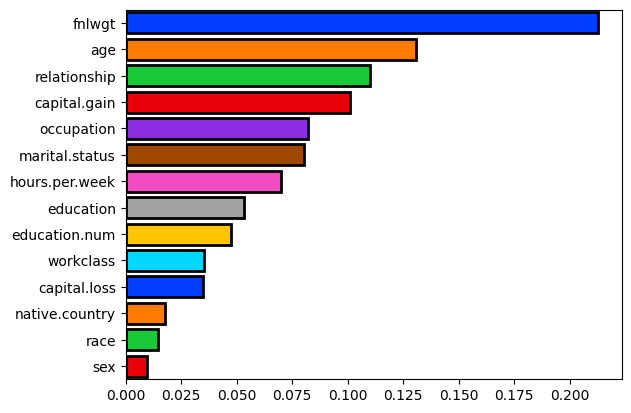

In [52]:
sns.barplot(
    x= features_scores,
    y= features_scores.index,
    palette = 'bright',
    saturation=2.0,
    edgecolor='black',
    linewidth=2.0
)

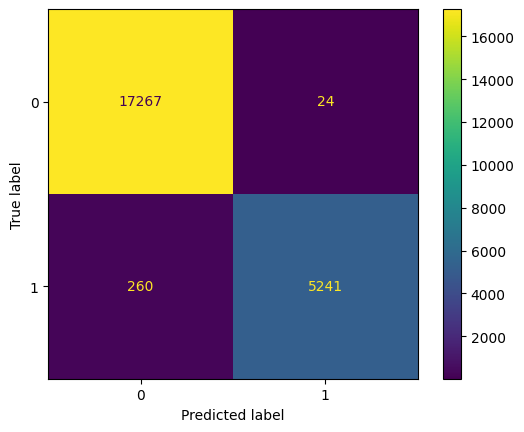

In [53]:
# Matriz de confusion para el entrenamiento
cm_train = confusion_matrix(y_train,y_train_pred_randomforest,labels=random_forest.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=random_forest.classes_)
disp_train.plot()
plt.show()

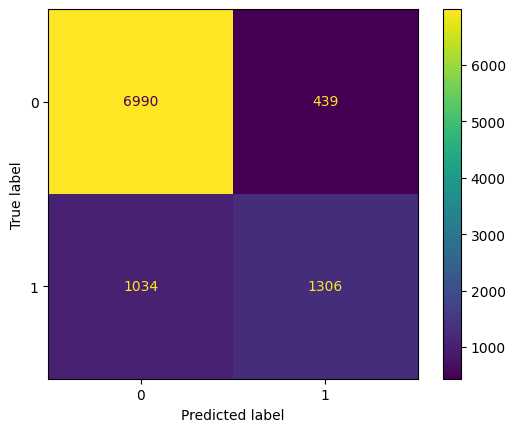

In [54]:
# Matriz de confusion para el testeo
cm_test = confusion_matrix(y_test,y_test_pred_randomforest,labels=random_forest.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=random_forest.classes_)
disp_test.plot()
plt.show()

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_randomforest))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7429
           1       0.75      0.56      0.64      2340

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



## Utilización de SMOTEEN para balanceo de los target

In [56]:
from imblearn.combine import SMOTEENN

imp = SMOTEENN(sampling_strategy=0.99)

X_bal, y_bal = imp.fit_resample(X,y)

y_bal.value_counts(normalize=True)



income
1    0.594738
0    0.405262
Name: proportion, dtype: float64

In [57]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal,y_bal, random_state=00000)

In [58]:
print(X_train_bal.shape)
print(X_test_bal.shape)
print(y_train_bal.shape)
print(y_test_bal.shape)

(23203, 14)
(7735, 14)
(23203,)
(7735,)


Las clases de salida ahora se encuentran más balanceadas


In [59]:
random_forest_bal = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=0000)
random_forest_bal.fit(X_train_bal, y_train_bal)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)

In [60]:
y_train_bal_pred_randomforest = random_forest.predict(X_train_bal)
y_test_bal_pred_randomforest = random_forest.predict(X_test_bal)

In [61]:
print(f'El accuracy en el entrenamiento es de {accuracy_score(y_train_bal,y_train_bal_pred_randomforest)}')
print(f'El accuracy en el testeo es de {accuracy_score(y_test_bal,y_test_bal_pred_randomforest )}')

El accuracy en el entrenamiento es de 0.7986467267163729
El accuracy en el testeo es de 0.7998707175177764


In [62]:
features_scores_bal = pd.Series(
    random_forest_bal.feature_importances_,
    index = X.columns
).sort_values(ascending=False)

features_scores_bal

age               0.165183
fnlwgt            0.159901
relationship      0.131500
marital.status    0.104549
capital.gain      0.073572
education.num     0.073201
hours.per.week    0.073008
education         0.065471
occupation        0.055857
workclass         0.034920
capital.loss      0.022879
native.country    0.014647
race              0.013524
sex               0.011787
dtype: float64

<Axes: >

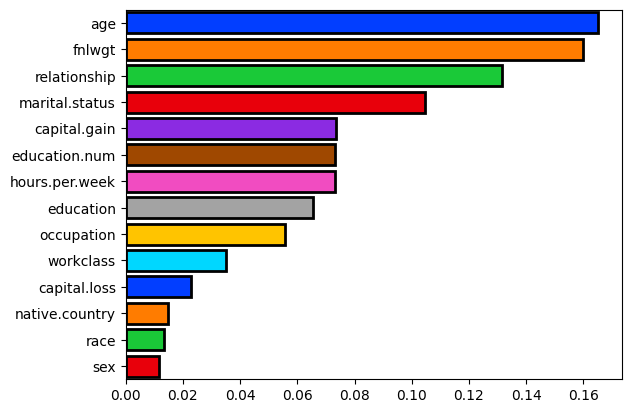

In [63]:
sns.barplot(
    x= features_scores_bal,
    y= features_scores_bal.index,
    palette = 'bright',
    saturation=2.0,
    edgecolor='black',
    linewidth=2.0
)

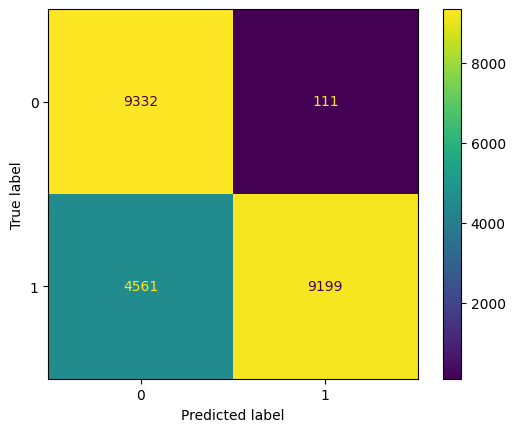

In [64]:
# Matriz de confusion para el entrenamiento con las clases balanceadas
cm_train_bal = confusion_matrix(y_train_bal,y_train_bal_pred_randomforest,labels=random_forest_bal.classes_)
disp_train_bal = ConfusionMatrixDisplay(confusion_matrix=cm_train_bal,display_labels=random_forest_bal.classes_)
disp_train_bal.plot()
plt.show()

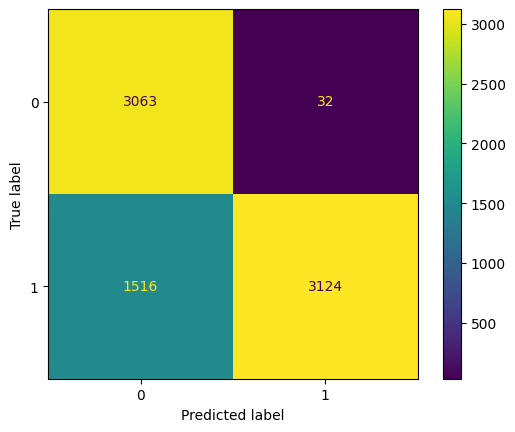

In [65]:
# Matriz de confusion para el testeo con las clases balanceadas
cm_test_bal = confusion_matrix(y_test_bal,y_test_bal_pred_randomforest,labels=random_forest_bal.classes_)
disp_test_bal = ConfusionMatrixDisplay(confusion_matrix=cm_test_bal,display_labels=random_forest_bal.classes_)
disp_test_bal.plot()
plt.show()

In [66]:
print(classification_report(y_test_bal,y_test_bal_pred_randomforest))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80      3095
           1       0.99      0.67      0.80      4640

    accuracy                           0.80      7735
   macro avg       0.83      0.83      0.80      7735
weighted avg       0.86      0.80      0.80      7735

